
🔍 Vorschau auf die Daten:
  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...             

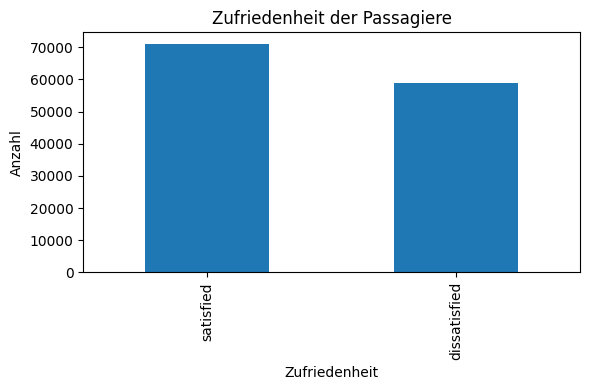

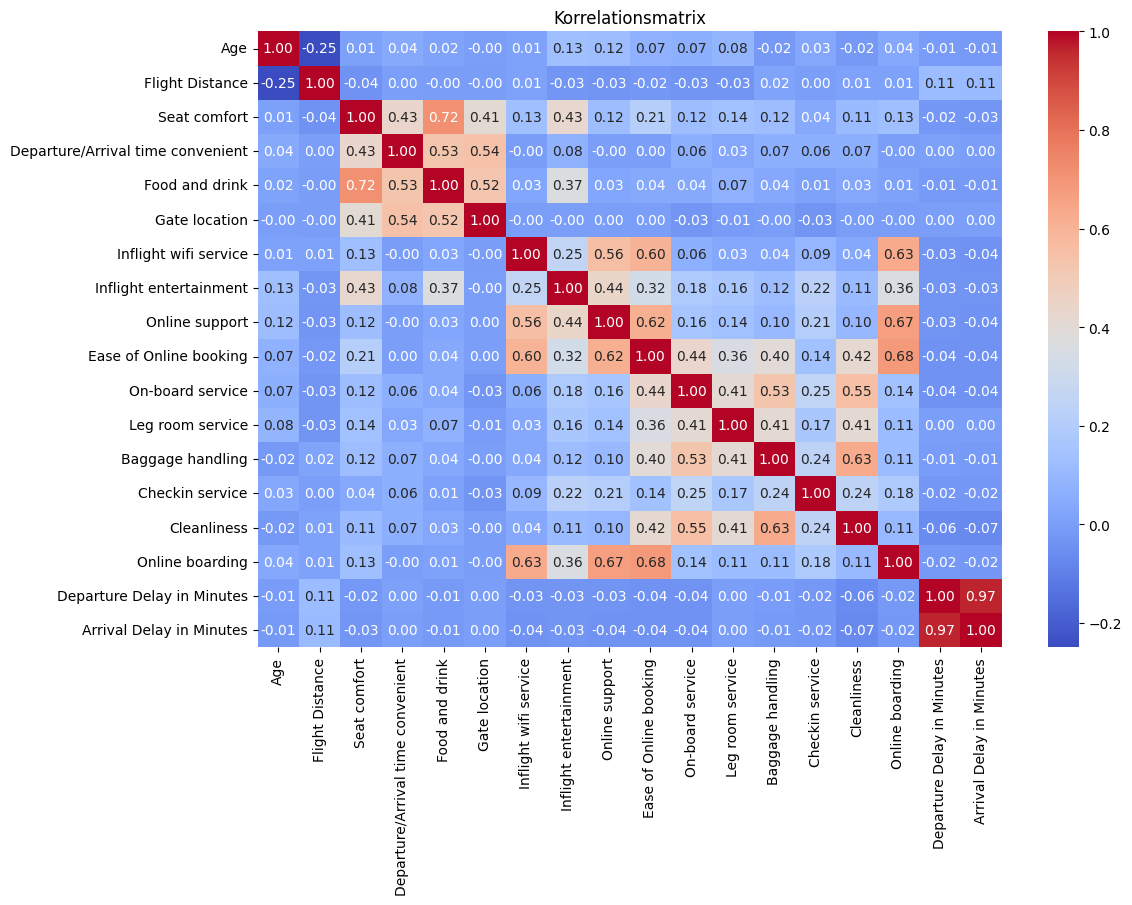

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [1]:
# 📊 Customer Satisfaction Analysis Notebook

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 📥 Daten einlesen
df = pd.read_csv("data/Invistico_Airline.csv")  # Passe den Dateinamen ggf. an
print("\n🔍 Vorschau auf die Daten:")
print(df.head())
# 2. 🧼 Datenanalyse
print("\n🧱 Spalten:", df.columns.tolist())
print("\n❓ Fehlende Werte pro Spalte:")
print(df.isnull().sum())

print("\n📊 Zufriedenheit (Target-Verteilung):")
print(df['satisfaction'].value_counts())

# 3. 📈 Visualisierung
plt.figure(figsize=(6,4))
df['satisfaction'].value_counts().plot(kind='bar')
plt.title("Zufriedenheit der Passagiere")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

# Heatmap der numerischen Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()

# 4. 🧠 Machine Learning

# Vorbereitung: Nur numerische + sinnvoll gewandelte Features nutzen
# Beispiel: einfache Vorverarbeitung
from sklearn.preprocessing import LabelEncoder

# Kopie des Datensatzes
X = df.copy()

# Zielvariable encodieren
y = LabelEncoder().fit_transform(X['satisfaction'])
X = X.drop(columns=['satisfaction'])

# Kategorische Features codieren
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klassifikator trainieren
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Vorhersage & Bewertung
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:")
print(classification_report(y_test, y_pred))
